In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#drive.flush_and_unmount()

In [0]:
import sys
ROOT_PATH = '/content/drive/My Drive/NLP/project/code/'
ROOT_PATH = '/content/drive/My Drive/university/projects/NLP/project/code/'
sys.path.append(ROOT_PATH)

In [0]:
ROOT_PATH_DATA = f"{ROOT_PATH}data/"
ROOT_PATH_ORIGIN_DATA = f'{ROOT_PATH_DATA}liar_dataset/test/'

In [9]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from pathlib import Path
!pip install empath
from utils.preprocessing import *
from utils.data_utils import *
from IPython.display import display
import seeborn as sns

ModuleNotFoundError: ignored

# Create base data

In [0]:
def preprocessing_cloumns(d):
  data = pd.read_csv(f"{ROOT_PATH_ORIGIN_DATA}{d}.tsv", sep='\t', names=cols_names, usecols=["ID",	"label",	"text"])
  data['class'] = data.label.where(data.label.isin(['false','barely-true','pants-fire']), 0)
  data['class'] = data["class"].where(data["class"]==0, 1)
  data["label"] = data["label"].astype('category')
  data["label"] = data["label"].cat.codes
  return data

In [0]:
data_sets = ["train","valid"]
cols_names = ["ID","label","text","subject","speaker","speaker's job title","state info",
"party affiliation","barely true counts","false counts","half true counts","mostly true counts","pants on fire counts","context"]
categories_cols_names = ['catLaw','catCommunication', 'catCrime', 'catPayment',
                    'catPhone', 'catBanking', 'catWar', 'catEconomics', 
                    'catPolitics', 'catLeader', 'catSocialMedia', 'catSchool',
                    'catGovernment', 'catMoney', 'catWork', 'catSpeaking', 
                    'catInternet', 'catBusiness']

categories_names = ('law','communication', 'crime', 'payment', 'phone', 
                         'banking', 'war', 'economics', 'politics', 'leader', 
                         'social_media', 'school','government', 'money', 'work',
                         'speaking', 'internet', 'business')

sentiment_cols_names = ['sentNeg', 'sentNeutral', 'sentPos', 'sentCompound']

for d in data_sets:
  path_data_tokenized = Path(f"{ROOT_PATH_DATA}preprocessed/liar_dataset/{d}_tokenized.csv")
  combined_csv = preprocessing_cloumns(d)
  display(combined_csv)
  display(combined_csv.info())
  #tokenization
  combined_csv['text_tokenized'] = combined_csv['text'].apply(text_to_wordlist)
  combined_csv.to_csv(path_data_tokenized, index=False)
  #lexical Features
  combined_csv[["article_length", "total_sentences", "avg_sent_length", "word_count", "number_count","avg_word_length", "count_pos_adj", "count_pos_sl", "count_exclamation","count_date", "allCapsCount"]] =\
    combined_csv.apply(lexical_features_extraction, result_type='expand', axis=1)
  int_colunms = ['article_length', 'total_sentences', 'word_count','number_count', 'count_pos_adj', 'count_pos_sl','count_exclamation', 'count_date', 'allCapsCount']
  combined_csv[int_colunms] = combined_csv[int_colunms].astype('int32')
  combined_csv.to_csv(path_data_tokenized, index=False)
  # Sentiment + Categories Features:
  combined_csv[categories_cols_names] = combined_csv.apply(lambda row: categories_extraction(row.text), axis=1, result_type='expand')
  combined_csv.to_csv(path_data_tokenized, index=False)
  combined_csv[sentiment_cols_names] = combined_csv.apply(lambda row: sentiment_extraction(row.text), axis=1, result_type='expand')
  combined_csv.to_csv(path_data_tokenized, index=False)
  #combined_csv = combined_csv.drop(columns=['categories', 'sentiment'])
  combined_csv.to_csv(path_data_tokenized, index=False)
  

,ID,label,text,class
0,2635.json,1,Says the Annies List political group supports ...,1
1,10540.json,2,When did the decline of coal start? It started...,0
2,324.json,3,"Hillary Clinton agrees with John McCain ""by vo...",0
3,1123.json,1,Health care reform legislation is likely to ma...,1
4,9028.json,2,The economic turnaround started at the end of ...,0
...,...,...,...,...
10235,5473.json,3,There are a larger number of shark attacks in ...,0
10236,3408.json,3,Democrats have now become the party of the [At...,0
10237,3959.json,2,Says an alternative to Social Security that op...,0
10238,2253.json,1,On lifting the U.S. Cuban embargo and allowing...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 4 columns):
ID       10240 non-null object
label    10240 non-null int8
text     10240 non-null object
class    10240 non-null object
dtypes: int8(1), object(3)
memory usage: 250.1+ KB


None

,ID,label,text,class
0,12134.json,0,We have less Americans working now than in the...,1
1,238.json,4,"When Obama was sworn into office, he DID NOT u...",1
2,7891.json,1,Says Having organizations parading as being so...,1
3,8169.json,2,Says nearly half of Oregons children are poor.,0
4,929.json,2,On attacks by Republicans that various program...,0
...,...,...,...,...
1279,3419.json,2,"For the first time in more than a decade, impo...",0
1280,12548.json,3,Says Donald Trump has bankrupted his companies...,0
1281,401.json,5,"John McCain and George Bush have ""absolutely n...",0
1282,1055.json,1,A new poll shows 62 percent support the presid...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 4 columns):
ID       1284 non-null object
label    1284 non-null int8
text     1284 non-null object
class    1284 non-null object
dtypes: int8(1), object(3)
memory usage: 31.5+ KB


None

# Add Feaures

In [0]:
combined_csv['text_tokenized'].isna().sum()

0

# Create a sample and balanced dataset

In [1]:
path = f"{ROOT_PATH_DATA}preprocessed/liar_dataset/"
path_data_train = Path(f"{path}train_tokenized.csv")
combined_csv = pd.read_csv(path_data_train)

NameError: ignored

In [0]:
combined_csv.shape

(10240, 38)

In [0]:
path_data_tokenized_sample = Path(f"{path}train_tokenized_sample.csv")
combined_csv.sample(frac=0.7,random_state=1).to_csv(path_data_tokenized_sample, index=False)
path_data_tokenized_balanced = Path(f"{path}train_tokenized_balanced.csv")
pd.concat([combined_csv[combined_csv['label']==0].sample(frac=0.5),combined_csv[combined_csv['label']==1]]).to_csv(path_data_tokenized_balanced, index=False)

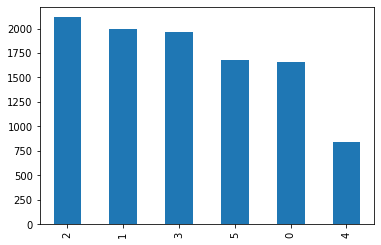

In [0]:
combined_csv['label'].value_counts().plot.bar()

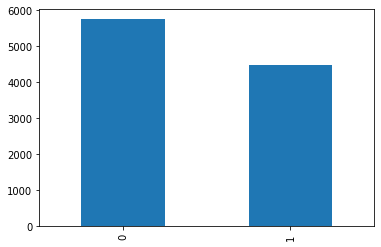

In [0]:
combined_csv['class'].value_counts().plot.bar()

In [0]:
combined_csv.columns

Index(['ID', 'label', 'text', 'class', 'text_tokenized', 'article_length',
       'total_sentences', 'avg_sent_length', 'word_count', 'number_count',
       'avg_word_length', 'count_pos_adj', 'count_pos_sl', 'count_exclamation',
       'count_date', 'allCapsCount', 'catLaw', 'catCommunication', 'catCrime',
       'catPayment', 'catPhone', 'catBanking', 'catWar', 'catEconomics',
       'catPolitics', 'catLeader', 'catSocialMedia', 'catSchool',
       'catGovernment', 'catMoney', 'catWork', 'catSpeaking', 'catInternet',
       'catBusiness', 'sentNeg', 'sentNeutral', 'sentPos', 'sentCompound'],
      dtype='object')

In [0]:
def plot_corr_matrix(combined_csv):
  # Compute the correlation matrix
  corr = combined_csv.corr()
  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(corr, dtype=np.bool))
  f, ax = plt.subplots(figsize=(11, 9))
  cmap = sns.diverging_palette(220, 10, as_cmap=True) # Generate a custom diverging colormap
  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})
  plt.show()
  sns.heatmap(corr)
  plt.show()

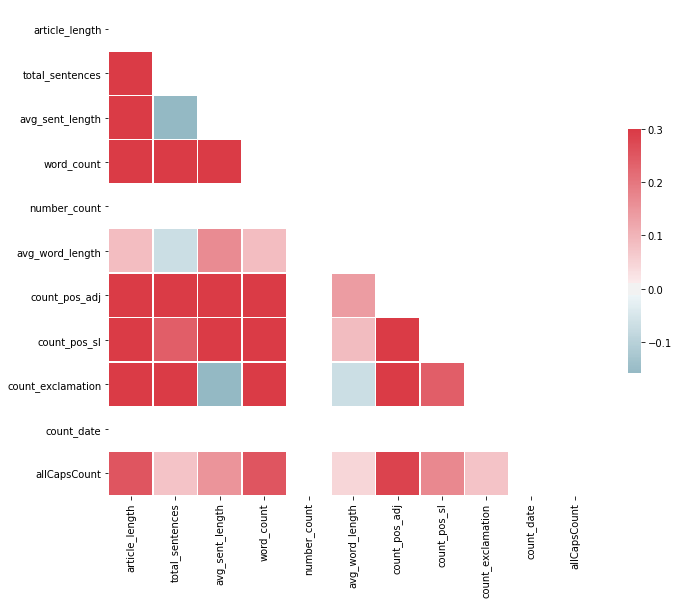

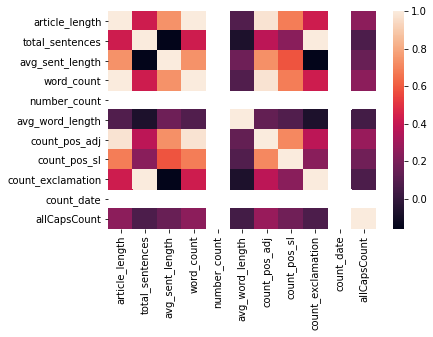

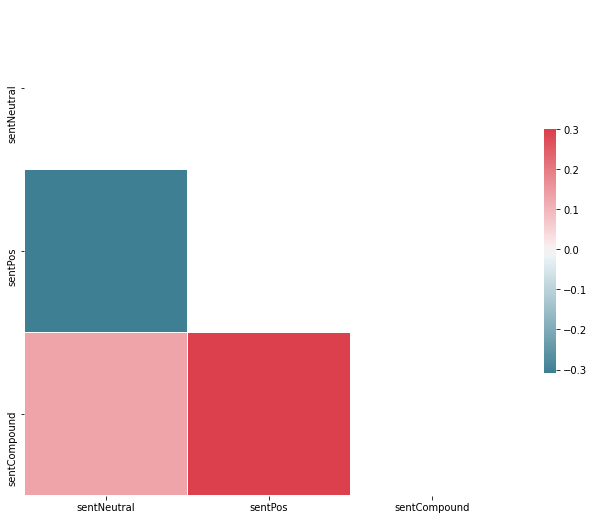

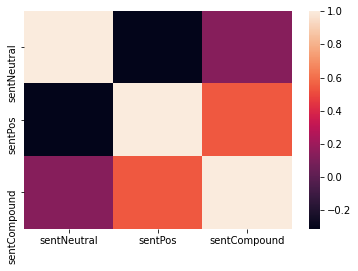

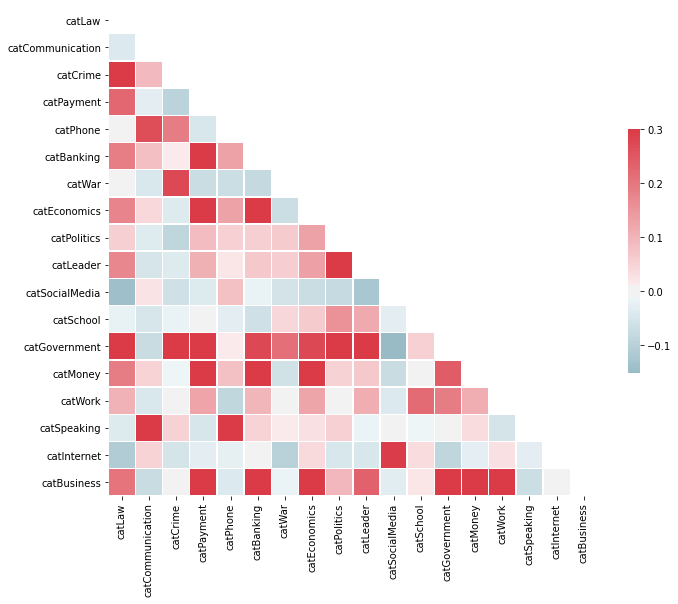

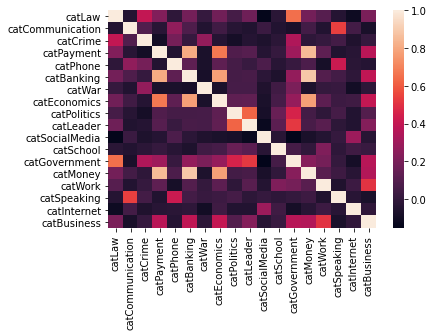

In [0]:
lexical = ["article_length", "total_sentences", 
"avg_sent_length", "word_count", "number_count",
"avg_word_length", "count_pos_adj", "count_pos_sl", 
"count_exclamation", "count_date", "allCapsCount"]

category = ["catLaw","catCommunication", "catCrime","catPayment",
                       "catPhone", "catBanking", "catWar", "catEconomics",
                       "catPolitics", "catLeader", "catSocialMedia", "catSchool", 
                       "catGovernment","catMoney","catWork", "catSpeaking",
                       "catInternet", "catBusiness"]

sentiment = ["sentNeutral","sentPos","sentCompound"]

features = {"lexical":lexical
          ,"sentiment":sentiment,
          "category":category}
          
for feat_name,feat_list in features.items():
  plot_corr_matrix(combined_csv[feat_list])
  